In [13]:
import pandas as pd
import numpy as np
import datetime 
import matplotlib.pyplot as plt


In [210]:
def load_one_file():
    ach_log_file = r"C:\Yahia\Home\Yahia-Dev\Python\training\xml\performance\SystemLog\SystemLog\Log10172021.txt"
    timex = []
    files = []
    actions=[]
    status = []
    line_no = 1
    with open(ach_log_file, 'rt') as f:
        while(True):
            line = f.readline()
            if not line:
                break
            
            try:
                x = line.split('::::')
                fdt_time = x[0] 
                action = x[1].split()[0]
            except:
                # print (line_no, 'error parsing action:', line)
                action = '***'
                fdt_time = ''

            ls = line.split('"')
            if len(ls) > 1:
                file_name = ls[1]
                ls = ls[2].split()
                download_status = ls[0] if len(ls) > 0 else ''
            else:
                file_name = ''
                download_status = ''
            # print(line_no, '- ', fdt_time, '----',action, '***', file_name)
            timex.append(fdt_time)
            files.append(file_name)
            actions.append(action)
            status.append(download_status)
            line_no += 1
            # timex.append(x)
            # time_str.append(ftime)
    data1={ 'Time':timex,
    'File': files,
    'Action':actions,
    'Status': status
    }
    data = pd.DataFrame(data1)
    data['Time'] = pd.to_datetime(data['Time'])

In [ ]:
import matplotlib.pyplot as plt
def plot_one_month():
    
    d = data.loc [data['Action'] == 'Downloading']
    d= d[d['Status'] == 'Completed']
    d['Hour']= d['Time'].dt.hour 
    x = d.groupby(['Hour']).count()['File']
    d = pd.DataFrame(x)
    d = d.rename(columns={'File':'Download'})

    u = data.loc [data['Action'] == 'Uploading']
    u= u[u['Status'] == 'Completed']
    u['Hour']= u['Time'].dt.hour 
    x = u.groupby(['Hour']).count()['File']
    u = pd.DataFrame(x)
    u=u.rename(columns={'File':'Upload'})
    all = d.join(u, on='Hour')

    all.plot( y=['Upload', 'Download'])
    plt.ylabel('No of files')
    data_date = data['Time'].dt.date.unique()[0]
    plt.title (data_date)
    plt.show()

In [18]:
import os
def load_all_files():
    timex = []
    files = []
    actions=[]
    status = []

    ach_log_dir = os.path.join(".",'data','SystemLog')
    for f in os.listdir(ach_log_dir):
        _, file_extension = os.path.splitext(f)
        if file_extension != '.txt':
            print (f)
            continue
        with open(os.path.join(ach_log_dir,f), 'rt') as fp:
            while(True):
                try:
                    line = fp.readline()
                except:
                    print (f, line)
                    continue
                if not line:
                    break
                
                try:
                    x = line.split('::::')
                    fdt_time = x[0] 
                    action = x[1].split()[0]
                except:
                    # print (line_no, 'error parsing action:', line)
                    action = '***'
                    fdt_time = ''

                ls = line.split('"')
                if len(ls) > 1:
                    file_name = ls[1]
                    ls = ls[2].split()
                    download_status = ls[0] if len(ls) > 0 else ''
                else:
                    file_name = ''
                    download_status = ''
                # print(line_no, '- ', fdt_time, '----',action, '***', file_name)
                timex.append(fdt_time)
                files.append(file_name)
                actions.append(action)
                status.append(download_status)
                # line_no += 1
    data1={ 'Time':timex,
        'File': files,
        'Action':actions,
        'Status': status
    }   
    data = pd.DataFrame(data1)
    data['Time'] = pd.to_datetime(data['Time'])
    data.to_csv(os.path.join('.','data','ach_log_data_all.csv'))
    
load_all_files()

In [1]:
import pandas as pd
data = pd.read_csv(os.path.join('.','data','ach_log_data_all.csv'), parse_dates=['Time'])

In [35]:
data

,Unnamed: 0,Time,File,Action,Status
0,0,2020-01-01 00:00:09,NaN,Open,NaN
1,1,2020-01-01 02:05:14,29_PRESETTLEMENT_202001010206220818.xml,Downloading,......
2,2,2020-01-01 02:05:14,29_PRESETTLEMENT_202001010206220818.xml,Downloading,Completed
3,3,2020-01-01 02:05:20,29_PRESETTLEMENT_202001010206220818.xml,Decrypting,......
4,4,2020-01-01 02:05:20,29_PRESETTLEMENT_202001010206220818.xml,Decrypting,Completed
...,...,...,...,...,...
3708213,3708213,2020-12-31 20:32:21,29_PACS004_20201231203209229079.xml,Delivery,Completed
3708214,3708214,2020-12-31 20:32:21,29_PACS002_20201231203209510062_S.xml,Decrypting,......
3708215,3708215,2020-12-31 20:32:22,29_PACS002_20201231203209510062_S.xml,Decrypting,Completed
3708216,3708216,2020-12-31 20:32:22,D:\ACHFiles_WorkStation\AutoDownloaded\Payment...,File,NaN


Data Validation

In [39]:
data.groupby(['File', 'Action', 'Status']).count().sort_values('Action')

Unnamed: 0  Time
File                                  Action     Status                     
29_PACS002_20210126154517823058_S.xml Decrypting Completed           1     1
29_PACS002_20210504134142636023_S.xml Decrypting Completed           1     1
29_PACS008_20200415104926551069.xml   Decrypting Completed           1     1
                                                 ......              1     1
29_PACS002_20210504134142652018_S.xml Decrypting ......              1     1
...                                                                ...   ...
29_PACS008_2021101313400184356.XML    Uploading  Completed           5     5
                                                 ......              5     5
29_PACS008_202107120937241330.XML     Uploading  Completed           3     3
29_PACS008_2021071209333038884.XML    Uploading  ......              3     3
core                                  Uploading  ......              8     8

[1967816 rows x 2 columns]

Summaries data for download/upload count file

In [29]:
d = data.loc [(data['Action'] == 'Downloading') & (data['Status'] == 'Completed')]
d['Date'] = d['Time'].dt.date
x = d.groupby(['Date']).count()['File']
d = pd.DataFrame(x)
d = d.rename(columns={'File':'Download'})

u = data.loc [(data['Action'] == 'Uploading') & (data['Status'] == 'Completed')]
u['Date']= u['Time'].dt.date 
x = u.groupby(['Date']).count()['File']
# x = u.groupby(['Time'].dt.date).count()['File']
u = pd.DataFrame(x) # reset index
u=u.rename(columns={'File':'Upload'})
file_count = d.join(u, on='Date')


C:\Users\yahia\AppData\Local\Temp/ipykernel_16536/4010635903.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d['Date'] = d['Time'].dt.date
C:\Users\yahia\AppData\Local\Temp/ipykernel_16536/4010635903.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  u['Date']= u['Time'].dt.date


In [30]:
file_count.head()

,Download,Upload
Date,,
2019-10-22,255,4.0
2019-10-23,356,3.0
2019-10-24,394,5.0
2019-10-25,2,NaN
2019-10-27,465,4.0


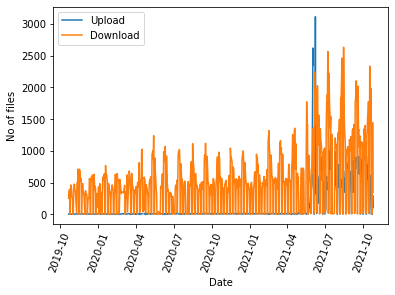

In [31]:
file_count.plot( y=['Upload', 'Download'])
plt.ylabel('No of files')
# data_date = data['Time'].dt.date.unique()[0]  
plt.xticks(rotation = 70)
# plt.title (data_date)
plt.show()

### plot upload/download number of files for a given period

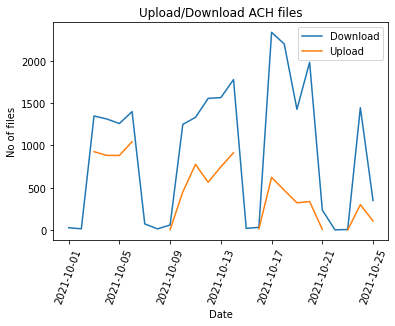

In [32]:
from_dt = '2021-10-01'
to_dt   = '2021-10-31'
file_count.loc[np.datetime64(from_dt): np.datetime64(to_dt)].plot()

plt.ylabel('No of files')
plt.xticks(rotation = 70)
plt.title ('Upload/Download ACH files')
plt.show()


Combine dataframe for elapsed time for upload/download time

In [216]:
data.columns

Index(['Unnamed: 0', 'Time', 'File', 'Action', 'Status'], dtype='object')

In [7]:
start = data[['Time','File', 'Action']].loc[(data['Status'] == '......') & (data['Action'].isin(['Downloading','Uploading'])) ]
# start.columns =['Start', 'File']
end = data[['Time','File', 'Action']].loc[(data['Status'] == 'Completed') & (data['Action'].isin(['Downloading','Uploading'])) ]
end.columns =['End', 'File', 'Action']
# start
# end
load_time=start.join(end.set_index(['File','Action']), on=['File', 'Action'])
load_time['Elapsed']= (load_time['End'] - load_time['Time']).dt.total_seconds()
load_time

,Time,File,Action,End,Elapsed
1,2020-01-01 02:05:14,29_PRESETTLEMENT_202001010206220818.xml,Downloading,2020-01-01 02:05:14,0.0
7,2020-01-01 03:05:14,29_4003076817_BOOKING_14608_1.xml,Downloading,2020-01-01 03:05:14,0.0
13,2020-01-01 03:05:49,29_4003076817_BOOKING_14608_2.xml,Downloading,2020-01-01 03:05:49,0.0
19,2020-01-01 03:06:22,29_4003076817_BOOKING_14608_3.xml,Downloading,2020-01-01 03:06:22,0.0
25,2020-01-01 05:02:28,29_Fees_20200101_20191231.txt,Downloading,2020-01-01 05:02:28,0.0
...,...,...,...,...,...
3708184,2020-12-31 17:44:53,29_PACS002_20201231174447167078_S.xml,Downloading,2020-12-31 17:44:53,0.0
3708194,2020-12-31 17:46:25,29_PACS003_20201231174623583018.xml,Downloading,2020-12-31 17:46:25,0.0
3708200,2020-12-31 17:46:36,29_PACS002_20201231174623646002_S.xml,Downloading,2020-12-31 17:46:36,0.0
3708206,2020-12-31 20:32:18,29_PACS004_20201231203209229079.xml,Downloading,2020-12-31 20:32:18,0.0


### get rid of records with negative elpased time !!!

In [21]:
load_time=load_time.loc[load_time['Elapsed'] >= 0]  # remove -ve elpased time
load_time

,Time,File,Action,End,Elapsed
1,2020-01-01 02:05:14,29_PRESETTLEMENT_202001010206220818.xml,Downloading,2020-01-01 02:05:14,0.0
7,2020-01-01 03:05:14,29_4003076817_BOOKING_14608_1.xml,Downloading,2020-01-01 03:05:14,0.0
13,2020-01-01 03:05:49,29_4003076817_BOOKING_14608_2.xml,Downloading,2020-01-01 03:05:49,0.0
19,2020-01-01 03:06:22,29_4003076817_BOOKING_14608_3.xml,Downloading,2020-01-01 03:06:22,0.0
25,2020-01-01 05:02:28,29_Fees_20200101_20191231.txt,Downloading,2020-01-01 05:02:28,0.0
...,...,...,...,...,...
3708184,2020-12-31 17:44:53,29_PACS002_20201231174447167078_S.xml,Downloading,2020-12-31 17:44:53,0.0
3708194,2020-12-31 17:46:25,29_PACS003_20201231174623583018.xml,Downloading,2020-12-31 17:46:25,0.0
3708200,2020-12-31 17:46:36,29_PACS002_20201231174623646002_S.xml,Downloading,2020-12-31 17:46:36,0.0
3708206,2020-12-31 20:32:18,29_PACS004_20201231203209229079.xml,Downloading,2020-12-31 20:32:18,0.0


Plot download/upload eplased time per dates

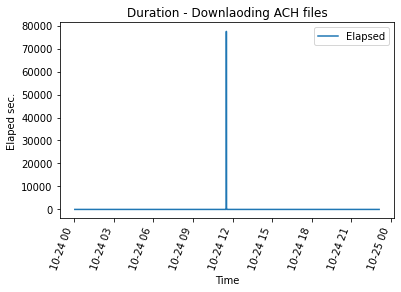

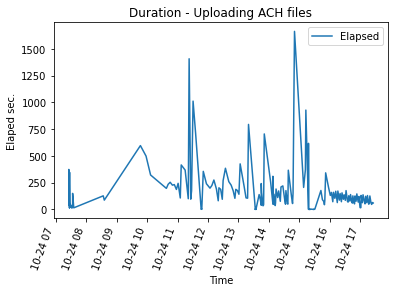

In [14]:
plot_date = '2021-10-24'
x=load_time.loc[load_time['Time'].dt.date == np.datetime64(plot_date)].set_index(['Time'])# limit the plot for one day 
p1=x.loc[x['Action'] == 'Downloading'].plot(y='Elapsed')
plt.ylabel('Elaped sec.')
plt.xticks(rotation = 70)
plt.title ('Duration - Downlaoding ACH files')
plt.show()
p2=x.loc[x['Action'] == 'Uploading'].plot(y='Elapsed')
plt.ylabel('Elaped sec.')
plt.xticks(rotation = 70)
plt.title ('Duration - Uploading ACH files')
plt.show()



Plot both donwload & upload in the sameg graph

C:\Users\yahia\AppData\Local\Temp/ipykernel_16536/3346383921.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['Elpased_dnld'] = 0
C:\Users\yahia\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
C:\Users\yahia\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\indexing.py:692: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https:

<AxesSubplot:xlabel='Time'>

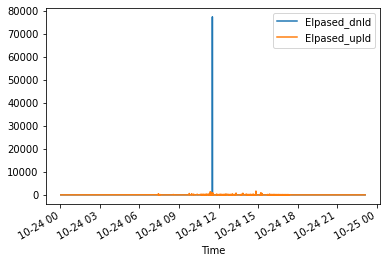

In [15]:
plot_date = '2021-10-24'
x=load_time.loc[load_time['Time'].dt.date == np.datetime64(plot_date)]# limit the plot for one day 
x.reset_index(inplace=True)
x['Elpased_dnld'] = 0
x['Elpased_dnld'].loc[x['Action'] == 'Downloading'] = x['Elapsed']
x['Elpased_upld'] = 0
x['Elpased_upld'].loc[x['Action'] == 'Uploading'] = x['Elapsed']
x.plot(x='Time', y=['Elpased_dnld','Elpased_upld' ])
# x.plot(x=).area(figsize=(12, 4), subplots=True)

Find files with upload/download elapsed time of more than x seconds

In [28]:
# load_time['Elapsed'].max()
load_time.loc[load_time['Elapsed'] == load_time['Elapsed'].max()]

,Time,File,Action,End,Elapsed
1098163,2021-06-15 12:14:18,29_PACS002_202106151214299079.XML,Uploading,2021-07-06 09:05:18,1803060.0


In [271]:
dd =load_time.loc[load_time['Time_start'].dt.date ==np.datetime64('2021-10-25'), ['Time_start', 'elapsed']]

In [ ]:
dd.loc[dd['elapsed']< np.datetime64(0, 's')]

In [40]:
data[data['File'] == '29_PACS008_2021101313400184356.XML']

,Unnamed: 0,Time,File,Action,Status
3263132,3263132,2021-10-13 13:40:46,29_PACS008_2021101313400184356.XML,Uploading,......
3263133,3263133,2021-10-13 13:40:48,29_PACS008_2021101313400184356.XML,Uploading,Completed
3263134,3263134,2021-10-13 13:40:49,29_PACS008_2021101313400184356.XML,Moving,Completed
3263204,3263204,2021-10-13 13:41:47,29_PACS008_2021101313400184356.XML,Uploading,......
3263205,3263205,2021-10-13 13:41:50,29_PACS008_2021101313400184356.XML,Uploading,Completed
3263206,3263206,2021-10-13 13:41:50,29_PACS008_2021101313400184356.XML,Moving,Completed
3263219,3263219,2021-10-13 13:42:13,29_PACS008_2021101313400184356.XML,Uploading,......
3263224,3263224,2021-10-13 13:42:15,29_PACS008_2021101313400184356.XML,Uploading,Completed
3263225,3263225,2021-10-13 13:42:16,29_PACS008_2021101313400184356.XML,Moving,Completed
3263270,3263270,2021-10-13 13:43:37,29_PACS008_2021101313400184356.XML,Uploading,......


### List of records uploaded more than one time

In [19]:
# d = data[data.groupby(['File', 'Action', 'Status']).count() >1]
d = data.groupby(['File', 'Action', 'Status']).count()
d.head()

Unnamed: 0  \
File                                        Action    Status                  
130_PACS008_20200322085830542085.XML        Moving    Completed           1   
                                            Uploading ......              1   
                                                      Completed           1   
145157764_PACS0108_20200322089930542085.XML Moving    Completed           1   
                                            Uploading ......              1   

                                                                 Time  
File                                        Action    Status           
130_PACS008_20200322085830542085.XML        Moving    Completed     1  
                                            Uploading ......        1  
                                                      Completed     1  
145157764_PACS0108_20200322089930542085.XML Moving    Completed     1  
                                            Uploading ......        1

In [ ]:
# d.info()
x = d.loc[d['Time'] >1]
x.reset_index(inplace=True)
x =x.drop_duplicates('File')
# x.head()
y =data.set_index(['File'], inplace=True)
y =data.set_index(['File'], inplace=True).loc[data['File'] == x.set_index('File', inplace=True)]
# data.columns